Requirements
#
Pandas, matplotlyb, numpy, kagglehub, sklearn

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import kagglehub
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge
import statsmodels.formula.api as smf
#Pentru normalitate
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import shapiro 
from scipy.stats import kstest, norm
#Pentru Homoschedasticitate
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white


In [2]:
# !pip install kagglehub

In [3]:
# # Download latest version
# path = kagglehub.dataset_download("ayeshaimran123/social-media-and-mental-health-balance")
# print("Path to dataset files:", path)

Celula de mai sus descarca dataset-ul de pe kaggle, si il salveaza local. Copiaza path-ul din print, si muta dataset-ul in folderul asta

In [4]:
df = pd.read_csv('Mental_Health_and_Social_Media_Balance_Dataset.csv',index_col=0)

In [5]:
df.columns

Index(['Age', 'Gender', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
       'Stress_Level(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Social_Media_Platform',
       'Happiness_Index(1-10)'],
      dtype='object')

In [6]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


### Procesarea datelor intr-un format potrivit regresiei liniare
#
Gender -> transformare in 2 variabile binare, Male si Female. Other va fi in bias
#
Platforma Social Media -> 3 Variabile binare diferite

In [ ]:
date_procesate = df.copy(deep=1)
date_procesate["Male"] = date_procesate["Gender"].apply(lambda x: 1 if x =="Male" else 0)
date_procesate["Female"] = date_procesate["Gender"].apply(lambda x: 1 if x =="Female" else 0)
date_procesate["Facebook"] = date_procesate["Social_Media_Platform"].apply(lambda x: 1 if x =="Facebook" else 0)
date_procesate["Instagram"] = date_procesate["Social_Media_Platform"].apply(lambda x: 1 if x =="Instagram" else 0)
date_procesate["LinkedIn"] = date_procesate["Social_Media_Platform"].apply(lambda x: 1 if x =="LinkedIn" else 0)
date_procesate["Twitter"] = date_procesate["Social_Media_Platform"].apply(lambda x: 1 if x =="X (Twitter)" else 0)
date_procesate["YouTube"] = date_procesate["Social_Media_Platform"].apply(lambda x: 1 if x =="YouTube" else 0)

date_procesate.rename(columns={'Daily_Screen_Time(hrs)':'screenTime'
                              ,'Sleep_Quality(1-10)':'sleepQuality'
                              ,'Stress_Level(1-10)':'stressLevel'
                              ,'Exercise_Frequency(week)':'exerciseFreq'
                              ,'Happiness_Index(1-10)': 'happniesIndex'
                              ,'Days_Without_Social_Media':'daysWOSM'
                               },inplace=True)

In [9]:
platforma_varsta = pd.pivot_table(df,index=df["Age"],columns=["Social_Media_Platform"],aggfunc="size",fill_value=0)
platforma_varsta

Social_Media_Platform,Facebook,Instagram,LinkedIn,TikTok,X (Twitter),YouTube
Age,,,,,,
16,4,3,1,3,2,4
17,0,1,3,4,4,5
18,2,2,1,4,6,1
19,2,0,4,0,3,2
20,0,4,2,3,3,2
21,0,2,2,1,4,2
22,2,1,3,2,4,1
23,3,1,3,3,4,4
24,1,3,2,3,2,3


Se observa ca nu e foarte usor de interpretat acest pivot, asa ca ar fi indicat sa grupam pe categorii de varsta
# 
Vom grupa pe intervale din 10 in 10 ani

In [10]:
df["age_interval"] = df["Age"].apply(lambda x: "10-20" if ((x > 10) & (x <=20)) else
                                               "20-30" if ((x > 20) & (x <=30)) else
                                               "30-40" if ((x > 30) & (x <=40)) else
                                               "40-50")

In [11]:
platforma_varsta = pd.pivot_table(df,index=df["age_interval"],columns=["Social_Media_Platform"],aggfunc="size",fill_value=0)
platforma_varsta

Social_Media_Platform,Facebook,Instagram,LinkedIn,TikTok,X (Twitter),YouTube
age_interval,,,,,,
10-20,8,10,11,14,18,14
20-30,22,13,20,28,28,19
30-40,30,26,26,26,24,20
40-50,21,25,30,27,18,22


# Distributie varste

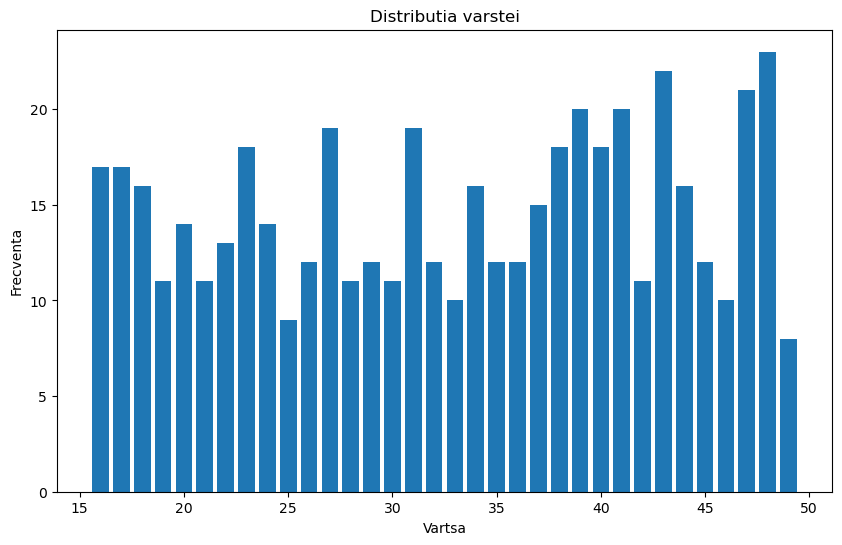

In [12]:
contor = df.groupby(by="Age")["Age"].count()

plt.figure(figsize=(10,6))
plt.bar(contor.index,contor.values,width=0.8)
plt.title("Distributia varstei")
plt.xlabel("Vartsa")
plt.ylabel("Frecventa")
plt.show()

## Distributia varstei pe interval

In [13]:
# contor = df.groupby(by="age_interval")["age_interval"].count()

# plt.figure(figsize=(10,6))
# plt.bar(contor.index,contor.values,width=0.8)
# plt.title("Distributia varstei")
# plt.xlabel("Vartsa")
# plt.ylabel("Frecventa")
# plt.show()

### Train test split

In [14]:
df.head()

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),age_interval
User_ID,,,,,,,,,,
U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,40-50
U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,20-30
U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,20-30
U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0,30-40
U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0,30-40


In [36]:
X_train, x_test, y_train, y_test = train_test_split(date_procesate
                                                   ,date_procesate["happniesIndex"]
                                                   ,test_size=0.2)

In [37]:
X_train

,Age,Gender,screenTime,sleepQuality,stressLevel,daysWOSM,exerciseFreq,Social_Media_Platform,happniesIndex,age_interval,Male,Female,Facebook,Instagram,LinkedIn,Twitter,YouTube
User_ID,,,,,,,,,,,,,,,,,
U178,47,Male,5.1,7.0,4.0,2.0,0.0,TikTok,9.0,40-50,1,0,0,0,0,0,0
U119,35,Female,6.3,6.0,7.0,6.0,4.0,Facebook,9.0,30-40,0,1,1,0,0,0,0
U110,28,Male,7.0,6.0,6.0,3.0,2.0,X (Twitter),8.0,20-30,1,0,0,0,0,1,0
U408,28,Male,2.6,10.0,3.0,4.0,3.0,Instagram,10.0,20-30,1,0,0,1,0,0,0
U482,46,Female,8.6,4.0,8.0,2.0,2.0,YouTube,4.0,40-50,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U219,36,Female,5.0,8.0,6.0,4.0,4.0,LinkedIn,10.0,30-40,0,1,0,0,1,0,0
U023,43,Male,3.6,8.0,5.0,3.0,1.0,Facebook,9.0,40-50,1,0,1,0,0,0,0
U054,30,Female,6.7,6.0,8.0,6.0,2.0,TikTok,7.0,20-30,0,1,0,0,0,0,0


## Incepem modelarea econometrica aici

In [17]:
# Am importat OLS mai sus din Statsmodels, asa ca acum putem sa ne jucam :)

In [44]:
regresie = smf.ols(formula="happniesIndex ~ Age + screenTime + sleepQuality +stressLevel", data=X_train).fit()
print(regresie.summary())

                            OLS Regression Results                            
Dep. Variable:          happniesIndex   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     182.2
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           2.76e-88
Time:                        17:22:12   Log-Likelihood:                -525.63
No. Observations:                 400   AIC:                             1061.
Df Residuals:                     395   BIC:                             1081.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.5946      0.534     17.958   

Din output, se observa urmataorele
#
Varianta explicata a modelului este de 64.8% (R-squared)
#
P value - 2.76 * 10^-88
#
Pana aici modelul este valid dpdv econometric
#
Mai jos verificam reziduurile

In [55]:
reziduuri = regresie.resid
print("Media reziduurilor:",reziduuri.mean())
#Ipoteza 1 se verifica, media erorilor sunt 0

Media reziduurilor: -5.719869022868807e-15


In [56]:
#Ipoteza 2: Normalitatea reziduurilorn
jb_test = jarque_bera(reziduuri)
print(jb_test)

(1.9622681270463613, 0.37488571347695626, -0.1675999458897698, 2.926671150467455)


In [ ]:
#Shapiro-Wilk
shapiro_test = shapiro(reziduuri)
print(shapiro_test)
#pavlue = 0.54, nu se poate respinde ipoteza de normalitate

ShapiroResult(statistic=0.9965292811393738, pvalue=0.5431490540504456)


In [58]:
#Kormogov-Smirnov
kstest(reziduuri, "norm", args=(reziduuri.mean(), reziduuri.std()))

KstestResult(statistic=0.027771318404232, pvalue=0.9086484326884725, statistic_location=-0.6432638898804584, statistic_sign=-1)

<Axes: ylabel='Frequency'>

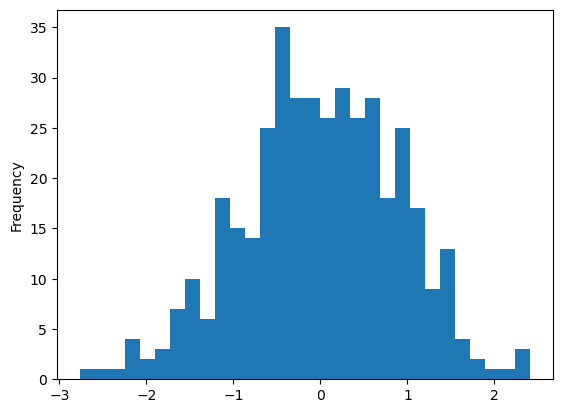

In [59]:
reziduuri.plot(kind="hist", bins=30)

Verificare homoschedasticitate

In [61]:
#Breushce-Pagan Test
exog = regresie.model.exog
bp_test = het_breuschpagan(reziduuri,exog)
print(bp_test)

(24.65480713591095, 5.902312546405413e-05, 6.48646166504332, 4.601941970304769e-05)


In [62]:
#White test
white_test = het_white(reziduuri,exog=exog)
print(white_test)

(30.513150845622008, 0.006481386191882436, 2.2710189826106895, 0.005506386593379182)


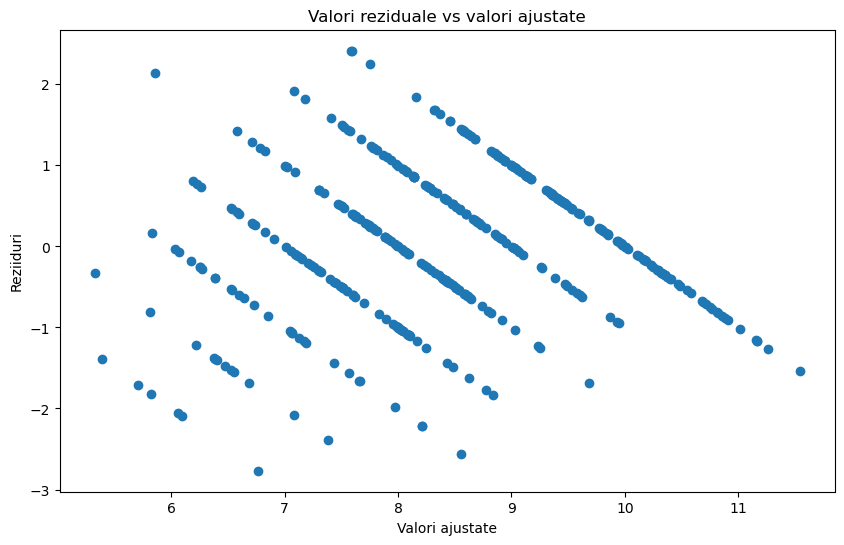

In [67]:
#Scatter  fitted vs residuals
fit = regresie.fittedvalues
plt.figure(figsize=(10,6))
plt.scatter(fit,reziduuri)
plt.title("Valori reziduale vs valori ajustate")
plt.xlabel("Valori ajustate")
plt.ylabel("Reziiduri")
plt.show()

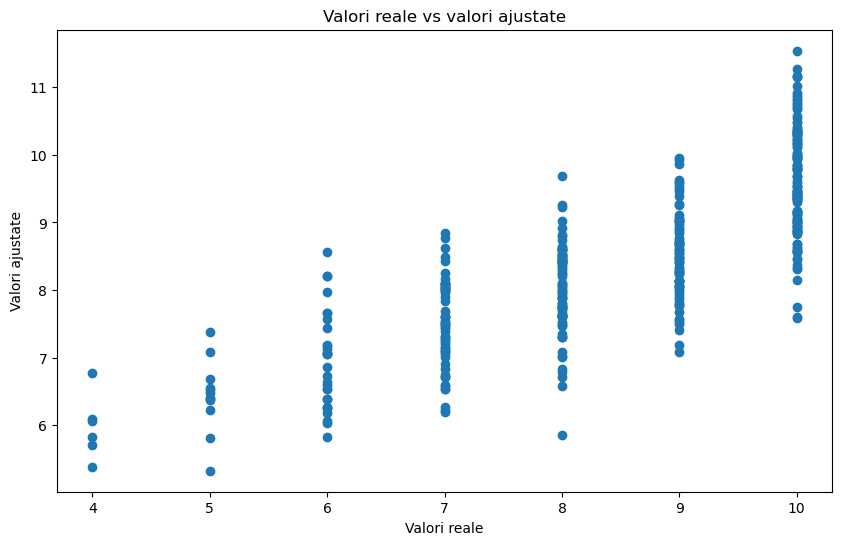

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(X_train['happniesIndex'],fit)
plt.title("Valori reale vs valori ajustate")
plt.xlabel("Valori reale")
plt.ylabel("Valori ajustate")
plt.show()